<a href="https://colab.research.google.com/github/yongzhiqu/FRF-Learning-with-Few-Shot-Multivariate-Regression/blob/main/Homework_8_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 10]

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
def DMD(data, r):
    """Dynamic Mode Decomposition (DMD) algorithm."""
    
    ## Build data matrices # d/dt (x) = A * x ; x(k+1) = B * x; B = 1+ deltat*A
    X1 = data[:, : -1]
    X2 = data[:, 1 :]
    ## Perform singular value decomposition on X1
    u, s, v = np.linalg.svd(X1, full_matrices = False)
    ## Compute the Koopman matrix
    A_tilde = u[:, : r].conj().T @ X2 @ v[: r, :].conj().T * np.reciprocal(s[: r])
    ## Perform eigenvalue decomposition on A_tilde
    Phi, Q = np.linalg.eig(A_tilde)
    ## Compute the coefficient matrix
    Psi = X2 @ v[: r, :].conj().T @ np.diag(np.reciprocal(s[: r])) @ Q
    A = Psi @ np.diag(Phi) @ np.linalg.pinv(Psi)
    
    return A_tilde, Phi, A

In [ ]:
import numpy as np
def DMD4cast(data, r, pred_step):
    N, T = data.shape
    _, _, A = DMD(data, r)
    mat = np.append(data, np.zeros((N, pred_step)), axis = 1)
    for s in range(pred_step):
        mat[:, T + s] = (A @ mat[:, T + s - 1]).real
    return mat[:, - pred_step :]

[[ 1.   2.   3.   4.   5.   6.   7.   8.   9.  10. ]
 [ 0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3]]

-------------------------------

[[11.  12.  13.  14.  15.  16.  17.  18.  19.  20. ]
 [ 3.6  3.9  4.2  4.5  4.8  5.1  5.4  5.7  6.   6.3]]


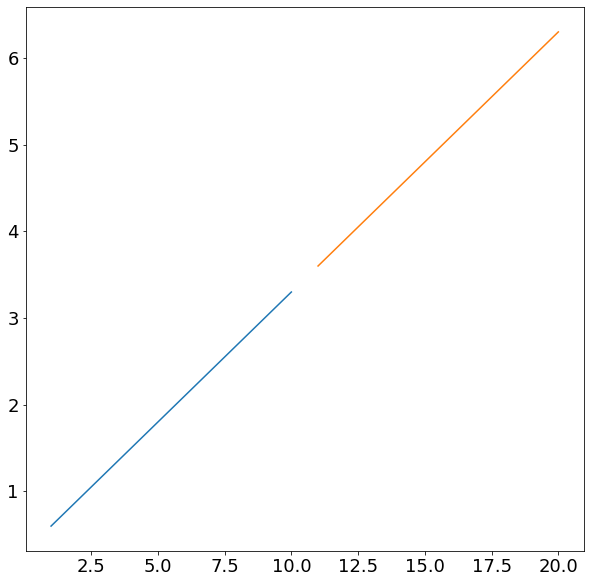

In [ ]:
X = np.zeros((2, 10))
X[0, :] = np.arange(1, 11)
X[1, :] = np.arange(2, 12)*0.3
print(X)
pred_step = 10
r = 2
mat_hat = DMD4cast(X, r, pred_step)

print('\n-------------------------------\n')


print(mat_hat)

plt.plot(X[0, :],X[1, :])
plt.plot(mat_hat[0, :],mat_hat[1, :])
plt.show()

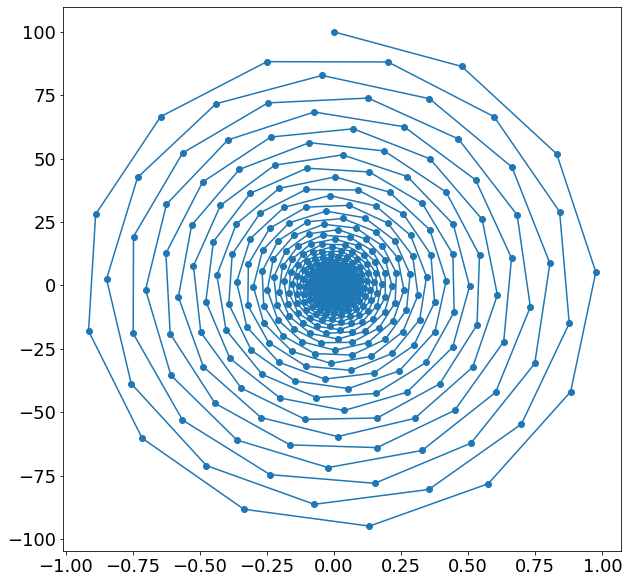

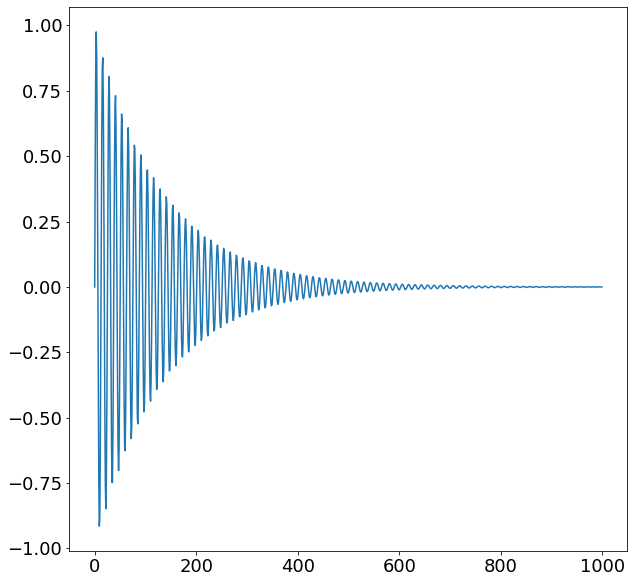

In [ ]:
X = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/differential_equ_100Hz.csv', dtype = 'float', delimiter=',')
plt.plot(X[:,0],X[:,1], marker = 'o')
plt.show()

plt.plot(X[:,0])
plt.show()

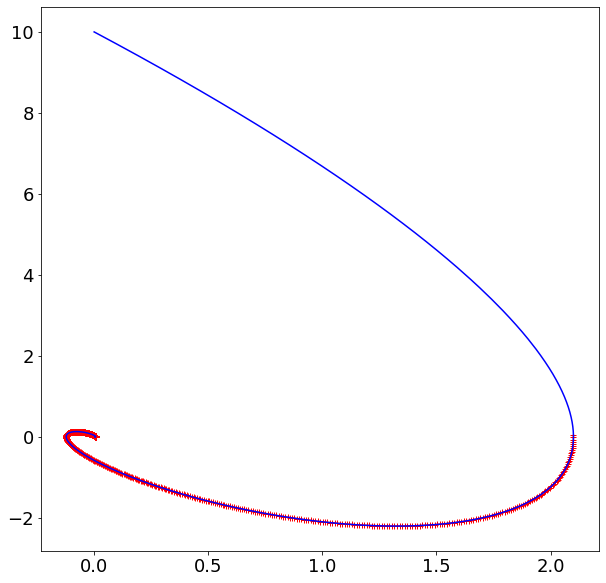

In [ ]:
N=100
X_diff = X.transpose()[:,0:N]
pred_step = 900
r = 2
mat_hat = DMD4cast(X_diff, r, pred_step)
#print(mat_hat[:,0:pred_step])
plt.plot(mat_hat[0,:],mat_hat[1,:],color='r', marker ='+')
plt.plot(X[:,0],X[:,1],color='blue')
plt.show()
